#### Libraries

In [1]:
                                    ####### VISUALIZATION TOOLS #######

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import colormaps as cm
import matplotlib.patches as mpatches 
from matplotlib.patches import Patch

import seaborn as sns
import warnings #ignore the errors for newer version of distplot
warnings.filterwarnings("ignore", category=UserWarning) 

import plotly.express as px
import plotly.graph_objects as go

import folium
from folium import plugins
from folium import Choropleth


                                    ####### VECTORS AND MATRICES #######

import numpy as np
import pandas as pd

                                    ####### SCIPY #######

from scipy import stats

                                    ####### SCIKIT-LEARN #######

from sklearn.preprocessing import StandardScaler #for Z-score normalization
from sklearn.preprocessing import normalize  #normalization along rows
from sklearn.preprocessing import PolynomialFeatures #to do a polynomial regression
from sklearn.preprocessing import OneHotEncoder #one-hot encoding adding columns
from sklearn.preprocessing import LabelEncoder #from strings to label
from sklearn.preprocessing import label_binarize #one-hot encoding of vectors

from sklearn.linear_model import LinearRegression #for linear (parameter) regression
from sklearn.linear_model import Ridge #for Ridge regression
from sklearn.linear_model import Lasso #for Lasso regression
from sklearn.linear_model import LogisticRegression #logistic regression 


from sklearn.tree import DecisionTreeClassifier #for tree classifier (not regression)
from sklearn.tree import DecisionTreeRegressor #for regression tree
from sklearn.tree import plot_tree #to plot the tree

from sklearn.svm import LinearSVC #supported vector machine
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier #KNN

from sklearn.cluster import KMeans #Kmeans

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error #for MSE error
from sklearn.metrics import r2_score #for the R^2 score on muliple variable regression
from sklearn.metrics import log_loss # for the cross-correlation entropy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score # k-means accuracies
from sklearn.metrics import explained_variance_score #for explained variance

from sklearn.pipeline import Pipeline #to use pipelines

from sklearn.model_selection import train_test_split #train-test splitting
from sklearn.model_selection import cross_val_score #K-fold validation
from sklearn.model_selection import cross_val_predict #K-fold validation
from sklearn.model_selection import StratifiedKFold #K-fold validation
from sklearn.model_selection import GridSearchCV #for GridSearchCV


from sklearn.multiclass import OneVsOneClassifier #multiclass classification using binary classification instead

from sklearn.utils.class_weight import compute_sample_weight

from sklearn.decomposition import PCA

from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

import umap.umap_ as UMAP 
from sklearn.manifold import TSNE


from sklearn.datasets import make_blobs 
from sklearn.datasets import make_classification

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
from sklearn.datasets import load_breast_cancer
cancers = load_breast_cancer()
from sklearn.datasets import load_iris
iris=load_iris()
from sklearn.datasets import fetch_california_housing
cal_housing = fetch_california_housing


                                    ####### ENSAMBLE METHODS #######

from xgboost import XGBRegressor

                                    ####### PYTORCH #######
import torch
from torch import nn #train neural networks
from torch import optim #optimizer
from torch.utils.data import Dataset, DataLoader, random_split
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Subset
import torchvision.models as models

                                   ####### IMAGES #######
                                   
import os
from PIL import Image # converting images into arrays
from PIL import ImageFile

from copy import copy
import operator
import sys

                                   ####### SCRAPING #######
import urllib




import gymnasium
from gymnasium.wrappers import RecordVideo
import glob, io, base64
from IPython.display import HTML
from IPython import display as ipythondisplay
import random
import wordcloud
from wordcloud import WordCloud, STOPWORDS

from collections import namedtuple, deque

import time #time of running

# Dataset and preparation

| Field         | Description                                           | Unit            | Type   |
| :------------ | :---------------------------------------------------- | :-------------- | :----- |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged over 10 minutes prior to 9am  | Compass Points  | object |
| WindDir3pm    | Wind direction averaged over 10 minutes prior to 3pm  | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged over 10 minutes prior to 9am      | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged over 10 minutes prior to 3pm      | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was at least 1mm of rain today               | Yes/No          | object |
| RainTomorrow  | If there is at least 1mm of rain tomorrow             | Yes/No          | object |

Load the dataset:

In [9]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/_0eYOqji3unP1tDNKWZMjg/weatherAUS-2.csv"
df = pd.read_csv(url)
df = df.rename(columns={'RainToday': 'RainYesterday',
                        'RainTomorrow': 'RainToday'
                        })
df = df[df.Location.isin(['Melbourne','MelbourneAirport','Watsonia',])]
df = df.dropna() #drop all columns with missing values
print('The dataset has shape',df.shape)
df.head()

The dataset has shape (7557, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,RainToday
64191,2009-01-01,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,...,55.0,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes
64192,2009-01-02,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,...,50.0,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No
64193,2009-01-03,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,...,51.0,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No
64194,2009-01-04,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,...,67.0,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No
64195,2009-01-05,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,...,51.0,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No


We feature engineering a new feature 'Season' from the 'Date' column, since the 'Season' should be more informative than 'Date'. To this aim, we use a function that transform the date to a season:

In [ ]:
def date_to_season(date):
    month = date.month
    if (month == 12) or (month == 1) or (month == 2):
        return 'Summer'
    elif (month == 3) or (month == 4) or (month == 5):
        return 'Autumn'
    elif (month == 6) or (month == 7) or (month == 8):
        return 'Winter'
    elif (month == 9) or (month == 10) or (month == 11):
        return 'Spring'

df['Date'] = pd.to_datetime(df['Date'])
df['Season'] = df['Date'].apply(date_to_season)
df=df.drop(columns='Date')

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,RainToday,Season
64191,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,SW,...,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes,Summer
64192,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,SSE,...,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No,Summer
64193,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,S,...,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No,Summer
64194,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,SSE,...,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No,Summer
64195,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,SSE,...,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No,Summer


Now we can define the target variable:

In [16]:
X = df.drop(columns='RainToday', axis=1)
y = df['RainToday']

y.value_counts()

RainToday
No     5766
Yes    1791
Name: count, dtype: int64

We see that it does not rain very often in the Melbourne area (23.7% of the days are rainy). Assuming that it will not rain tomorrow, we will be 76.3% accurate. The dataset is not balanced, so we will have to ensure target stratification in the next steps (in the train-test splitting and in the cross-validation).

## Dealing with remaining missing values and normalization

In [24]:
def NaN_value_finder(dataframe):
    dataframe=dataframe.replace('?',np.nan)
    missing_data = dataframe.isnull()
    missing_dict=dict()
    missing_index=list()
    for column in missing_data.columns.values.tolist():
        for i,value in enumerate(missing_data[column]):
            if missing_data[column][i]==True:
                missing_index.append(i)
                missing_dict[column]=missing_dict.get(column,0)+1
    for i,value in enumerate(missing_dict):
        print('There are', missing_dict[value], 'out of',dataframe.shape[0],
              'null values in the column',value,'(',np.round((missing_dict[value]/dataframe.shape[0])*100,2).item(),'%)')
    return missing_dict, missing_index


missing_dict, missing_index = NaN_value_finder(df.reset_index())

So there are not missing values (as expected)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train.shape

(6045, 22)

In [26]:
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist() 
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model 1: Random Forest

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

cv = StratifiedKFold(n_splits=5, shuffle=True)

grid_search = GridSearchCV(estimator=pipeline,
                    param_grid=param_grid, 
                    cv=cv, 
                    scoring='accuracy', 
                    verbose=2)

grid_search.fit(X_train, y_train)

test_score = grid_search.score(X_test, y_test)
print(f"\nTest set accuracy: {test_score:.2%}")
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.8s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.8s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=

              precision    recall  f1-score   support

          No       0.86      0.95      0.90      1154
         Yes       0.76      0.50      0.61       358

    accuracy                           0.84      1512
   macro avg       0.81      0.73      0.75      1512
weighted avg       0.84      0.84      0.83      1512



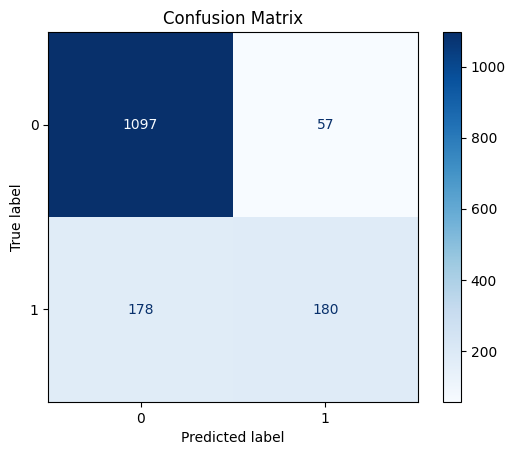

In [31]:
y_pred=grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

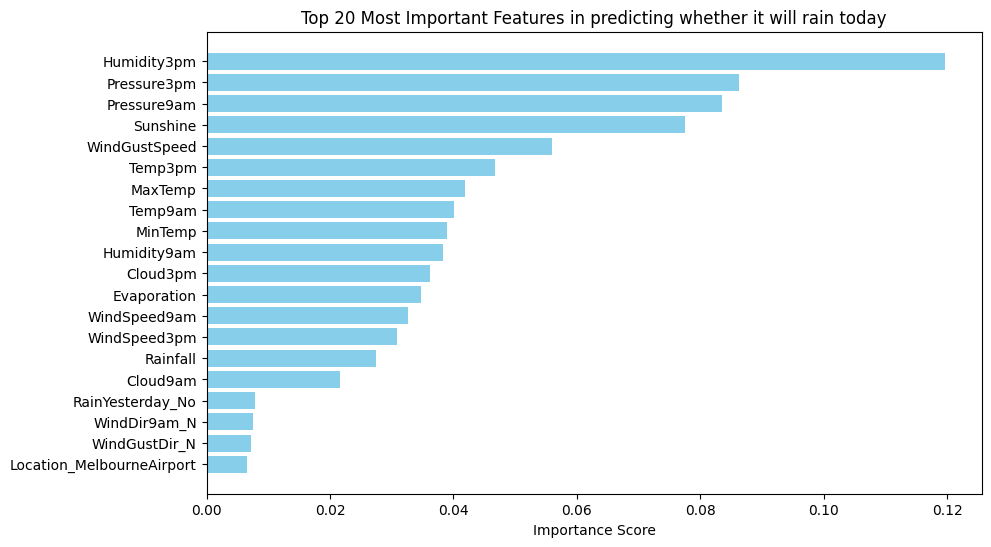

In [33]:
feature_importances = grid_search.best_estimator_['classifier'].feature_importances_

feature_names = numeric_features + list(grid_search.best_estimator_['preprocessor']
                                        .named_transformers_['cat']
                                        .named_steps['onehot']
                                        .get_feature_names_out(categorical_features))

feature_importances = grid_search.best_estimator_['classifier'].feature_importances_

importance_df = pd.DataFrame({'Feature': feature_names,
                              'Importance': feature_importances
                             }).sort_values(by='Importance', ascending=False)

N = 20  # Change this number to display more or fewer features
top_features = importance_df.head(N)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.title(f'Top {N} Most Important Features in predicting whether it will rain today')
plt.xlabel('Importance Score')
plt.show()

# Model 2: Logistic Regression

In [35]:
pipeline.set_params(classifier=LogisticRegression(random_state=42))
grid_search.estimator = pipeline

param_grid = {
    # 'classifier__n_estimators': [50, 100],
    # 'classifier__max_depth': [None, 10, 20],
    # 'classifier__min_samples_split': [2, 5],
    'classifier__solver' : ['liblinear'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight' : [None, 'balanced']
}

grid_search.param_grid = param_grid
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.2s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.2s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.2s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.2s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=No

              precision    recall  f1-score   support

          No       0.86      0.93      0.89      1154
         Yes       0.68      0.51      0.58       358

    accuracy                           0.83      1512
   macro avg       0.77      0.72      0.74      1512
weighted avg       0.82      0.83      0.82      1512



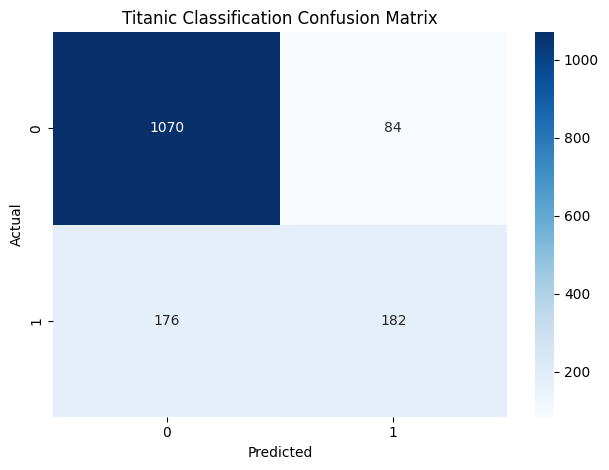

In [36]:
print(classification_report(y_test, y_pred))

# Generate the confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Titanic Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()